## Final Project Submission

Please fill out:
* Student name: Hunter Sapienza
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:

# Cervical Cancer Risk Factor Analysis and Classification

In the following project, we analyze the data with a focus on which risk factors appear to most significantly lead to positive biopsies for cervical cancer. Additionally, we aim to identify a model that most effectively classifies cases of cervical cancer based upon these risk factors. To achieve these goals, we will employ the OSEMN (obtain, scrub, explore, model, and analyze) data science model.

## Obtaining the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.shape

(858, 36)

In [6]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Upon first importing the dataset, we can examine a few records, information about each feature, and descriptive statistics for our continuous variables to notice important initial trends. The risk factor data for cervical cancer contains 858 total records, with 35 features leading to a final biopsy diagnosis, our target variable. In the first few rows, it appears some null values (in the form of '?') may need to be addressed as we scrub the data before proceeding to analysis. Many of the variables - such as smokes and smokes (yrs) - appear to be related and may be highly correlated, thus leading to multicollinearity issues during our modeling process.

Currently, only 10 of the 36 variables are coded as continuous variables; descriptive statistics for those are provided above. The average age of patients is approximately 27 years, with a maximum age of 84 and minimum age of 13. However, 50% of all records represent patients between the ages of 20 and 32. The majority of patients have never been diagnosed with an STD. The means for specific diagnoses provided above are all below 0.1, indicating that few patients in the 858 records were diaganosed with these diseases. Below, we will proceed with scrubbing the data, followed by further exploration. 

## Scrubbing the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [8]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


Based on the information above, none of the variables in our data contain null values. However, based upon the first few records we examine, we noticed that null values are actually indicated by '?'. We will address this missing data below.

As illustrated by the value counts for the feature labeled 'STDs,' it is evident that 105 of the patients represented did not provide data for this factor. For each of these 105 records, data is also missing for all other STD diagnoses. Thus, these records will provide little to no information of practical use when creating a classification model, as they are missing so much of the indicative data leading to a target biopsy label. Thus, we will remove these 105 records entirely from the dataframe. 753 records will remain, which will be plenty of useful information from which to work. 

The value counts for 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' contain 787 records with '?' values. Since replacing these values with the median value of 4.0 will inaccurately represent this variable, and no values of 0.0 exist for these features, we will replace the missing values with 0, as a placeholder that assumes they were either never diagnosed with a STD, or that it remains unknown information.

In [9]:
df['STDs'].value_counts()

0.0    674
?      105
1.0     79
Name: STDs, dtype: int64

In [10]:
df['STDs: Time since first diagnosis'].value_counts()

?       787
1.0      15
3.0      10
2.0       9
4.0       6
7.0       5
16.0      4
5.0       4
8.0       3
6.0       3
21.0      2
19.0      2
11.0      2
22.0      1
12.0      1
18.0      1
10.0      1
9.0       1
15.0      1
Name: STDs: Time since first diagnosis, dtype: int64

In [11]:
df['STDs: Time since last diagnosis'].value_counts()

?       787
1.0      17
2.0      10
3.0       9
4.0       6
7.0       5
16.0      4
8.0       3
6.0       3
5.0       3
21.0      2
11.0      2
12.0      1
22.0      1
19.0      1
18.0      1
10.0      1
9.0       1
15.0      1
Name: STDs: Time since last diagnosis, dtype: int64

In [12]:
df = df[df['STDs']!='?']

In [13]:
df['STDs: Time since last diagnosis'].replace('?',0,inplace=True)

In [14]:
df['STDs: Time since first diagnosis'].replace('?',0,inplace=True)

Once we take care of the missing values for the three features in the cells above, we replace the remaining '?' values with null values so we can get an accurate picture of the missing data will still have yet to deal with through the scrubbing process.

In [15]:
df.replace('?',np.nan,inplace=True)

In [16]:
df.isna().sum()

Age                                    0
Number of sexual partners             14
First sexual intercourse               6
Num of pregnancies                    47
Smokes                                10
Smokes (years)                        10
Smokes (packs/year)                   10
Hormonal Contraceptives               13
Hormonal Contraceptives (years)       13
IUD                                   16
IUD (years)                           16
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV        

Based on the count above, we still have null values for ten of the features, but with less than 20 null values for all but one of them ('Num of pregnancies'). In the following few cells, we will recode the entire dataframe as numeric data and replace the remaining null values with the median value for each respective feature.

In [17]:
df = df.convert_objects(convert_numeric=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 36 columns):
Age                                   753 non-null int64
Number of sexual partners             739 non-null float64
First sexual intercourse              747 non-null float64
Num of pregnancies                    706 non-null float64
Smokes                                743 non-null float64
Smokes (years)                        743 non-null float64
Smokes (packs/year)                   743 non-null float64
Hormonal Contraceptives               740 non-null float64
Hormonal Contraceptives (years)       740 non-null float64
IUD                                   737 non-null float64
IUD (years)                           737 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [19]:
for column in list(df.columns):
    df[column].fillna(df[column].median(),inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 857
Data columns (total 36 columns):
Age                                   753 non-null int64
Number of sexual partners             753 non-null float64
First sexual intercourse              753 non-null float64
Num of pregnancies                    753 non-null float64
Smokes                                753 non-null float64
Smokes (years)                        753 non-null float64
Smokes (packs/year)                   753 non-null float64
Hormonal Contraceptives               753 non-null float64
Hormonal Contraceptives (years)       753 non-null float64
IUD                                   753 non-null float64
IUD (years)                           753 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

Based on the information provided above, all of our data is 'non-null' and no more missing information must be addressed.

Below, we rename the final column 'Biopsy' with the target label 'Cancer' as this is key indicator utilized in cancer diagnoses. The tests associated with Hinselmann, Schiller, and Citology also can be indicative of cancer, but not as concretely as the biopsy, and thus will be kept as features to be used in the modeling process.

In [21]:
df['Cancer']=df.Biopsy

In [22]:
df.Cancer.value_counts()

0    700
1     53
Name: Cancer, dtype: int64

In [23]:
df.Hinselmann.value_counts()

0    718
1     35
Name: Hinselmann, dtype: int64

In [24]:
df.Schiller.value_counts()

0    680
1     73
Name: Schiller, dtype: int64

In [25]:
df.Citology.value_counts()

0    712
1     41
Name: Citology, dtype: int64

In future analysis, we may choose to use the following two cells to:
- Perform a multiclass classification model and analysis.
- Compare models for classification between Hinselmann, Schiller, Citology, and Biopsy.
- Create classification models for Biopsy in the absence of the other three diagnoses.

Throughout this project, we assume the inclusion of Hinselmann, Schiller, and Citology and focus primarly on Biopsy as our target variable for the following reasons:
- "Other tests can suggest that cancer is present, but only a biopsy can make a definite diagnosis." (American Society of Clinical Oncology)
- In-depth information about the timeline of these medical results is not provided with the dataset. We remain uncertain when tests for Hinselmann, Schiller, and Citology are run, prior to or in conjunction with the biopsy.
- We assume that Hinselmann, Schiller, and Citology results are available with other information on medical history and thus, can be used as predictive features in our classification models. Future work may involve modeling in the absence of this information.

In [24]:
# df['Cancer']=df.Hinselmann+df.Schiller+df.Citology+df.Biopsy
# df.Cancer.value_counts()

In [26]:
# df.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis=1,inplace=True)
df.drop(['Biopsy'],axis=1,inplace=True)

Here, we create two new dataframes: (1) the original 35 features with only 'Cancer' dropped, and (2) the target varible 'Cancer'.

In [27]:
features = df.drop(['Cancer'],axis=1)
target = df.Cancer
target.columns = ['Cancer']

## Exploring the Data

Now that we have thoroughly scrubbed our data, we are ready to begin an exploration of the features.

Below, we utilize StandardScaler to standardize all the features and subsequently plot the histograms for each feature to observe their distributions.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features),columns=features.columns)

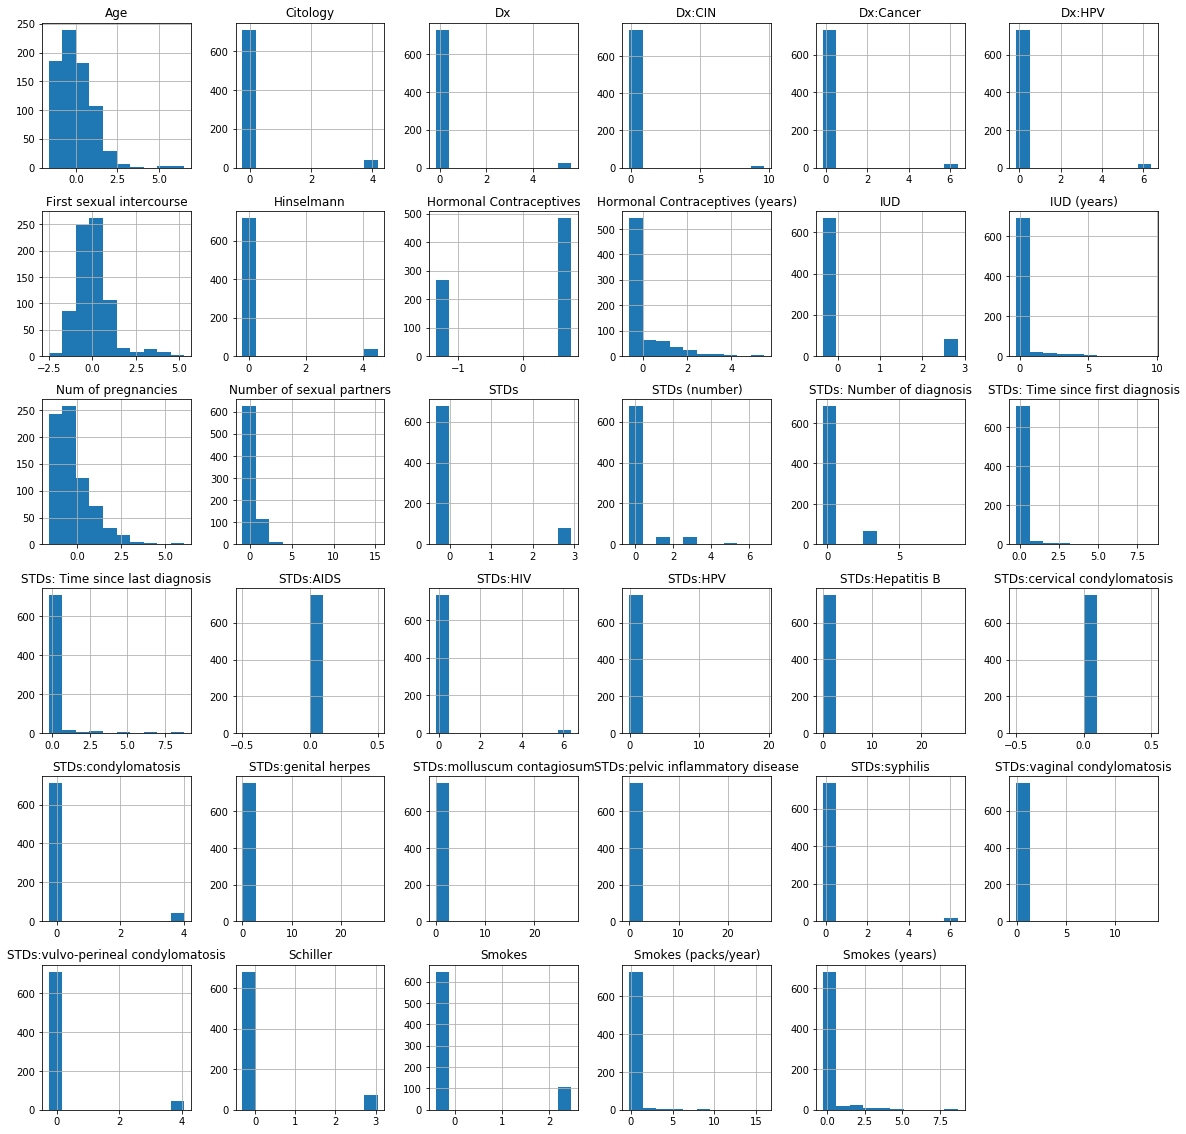

In [29]:
scaled_features.hist(figsize=(20,20));

In [30]:
features['STDs (number)'].value_counts()

0.0    674
2.0     37
1.0     34
3.0      7
4.0      1
Name: STDs (number), dtype: int64

The histograms above reveal that the majority of the features, particulary the STD diagnoses, are skewed right, with just a few recorded diagnoses for each feature. In our data, no diagnoses exist for AIDS or cervical condylomatosis, with particulary few for genital herpes, vaginal condylomatosis, pelvic inflammatory disease, HPV, and hepatitis B. In fact, only 79 records in the data have any STD diagnosis, with 34 of these identifying only 1 diagnosis ever in their medical history.

The age of the patients is also skewed right, reflective of the trends we noticed in the descriptive statistics earlier. 'First sexual intercourse,' 'Num of pregnancies,' and 'Hormonal Contraceptives (years)' also have distributions that are skewed right, indicating the relatively young nature of our data.

### Principal Component Analysis

In the next cell, we import and use Principal Component Analysis (PCA) to determine how many features we need to utilize in our modeling to represent 80% of the overall variance in our data. PCA allows us to reduce the dimensions of our feature space to minimize the impact of relationships between variables by creating a new set of independent variables based upon our data and focusing on those that most impact our target. Below we fit a different number of new features to our original features and calculate the explained variance for each.

In [40]:
from sklearn.decomposition import PCA
nfeatures = [5,10,13,14,15,16,17,18,19,20,25,30,33]
explained_variance = []
for n in nfeatures:
    pca = PCA(n_components=n)
    features_pca = pca.fit_transform(scaled_features)
    explained_variance.append(np.cumsum(pca.explained_variance_ratio_)[-1])
    print('Total Variance Explained with {} Features'.format(n),round(sum(list(pca.explained_variance_ratio_))*100, 2))

Total Variance Explained with 5 Features 45.66
Total Variance Explained with 10 Features 66.91
Total Variance Explained with 13 Features 76.26
Total Variance Explained with 14 Features 79.1
Total Variance Explained with 15 Features 81.68
Total Variance Explained with 16 Features 84.16
Total Variance Explained with 17 Features 86.58
Total Variance Explained with 18 Features 88.86
Total Variance Explained with 19 Features 91.09
Total Variance Explained with 20 Features 92.79
Total Variance Explained with 25 Features 98.35
Total Variance Explained with 30 Features 99.91
Total Variance Explained with 33 Features 100.0


Based on the output provided above, it appears that 15 features remains the optimal number in order to explain at least 80% of the variance in our data. The graph below illustrates that we do not reach this threshold of explained variance until we utilize 15 features.

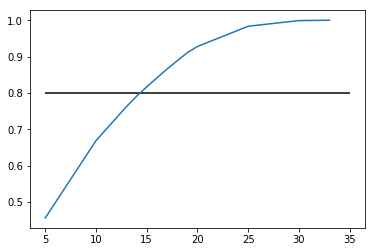

In [54]:
plt.plot(nfeatures,explained_variance)
plt.hlines(0.80,5,35)

In [55]:
pca = PCA(n_components=15)
features_principalcomponents = pca.fit_transform(scaled_features)
sum(list(pca.explained_variance_ratio_))*100

81.68297027961378

Now, we have two sets of feature data: (1) standardized original features, and (2) PCA-transformed features representing 80% of the data variance. We will utilize both sets of features when aiming to find the best classification model in the sections below.

In [57]:
pd.DataFrame(features_principalcomponents).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.881526,-1.123698,-0.426218,1.187348,0.129368,-0.112968,1.111762,-0.560218,-0.404851,-0.086700,0.506468,-0.115554,0.029840,-0.482037,-0.011155
1,-0.953435,-1.367723,-0.793614,1.266534,-0.015881,0.005090,1.150553,-0.303275,-0.545550,-0.157556,-0.322692,-0.171835,-0.229409,0.505716,0.102451
2,-0.912467,-0.777913,-0.519807,0.339820,0.255040,-0.148937,0.672446,0.913482,-0.009266,0.697732,0.049970,-0.034075,-0.327920,-0.009980,0.247366
3,0.922771,11.400845,11.074047,6.175173,0.137683,-4.845058,0.256494,1.351020,-0.804125,-0.012770,-0.671152,1.012160,0.321430,0.242140,-2.448329
4,-0.797665,0.869074,0.745907,-2.299611,0.571143,0.066325,-3.046975,0.834135,0.944678,0.080730,0.265081,-0.291027,0.440306,-0.341767,-0.256478


In [58]:
features_principalcomponents.shape

(753, 15)

In [59]:
scaled_features.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-1.063783,0.887110,-0.738012,-0.910419,-0.406982,-0.294467,-0.200467,-1.345251,-0.604981,-0.351967,...,-0.310405,-0.227971,-0.224498,-0.156492,-0.103626,-0.156492,-0.177502,-0.220786,-0.327648,-0.239967
1,-1.409601,-0.910183,-1.091300,-0.910419,-0.406982,-0.294467,-0.200467,-1.345251,-0.604981,-0.351967,...,-0.310405,-0.227971,-0.224498,-0.156492,-0.103626,-0.156492,-0.177502,-0.220786,-0.327648,-0.239967
2,0.780577,-0.910183,-0.031435,-0.910419,-0.406982,-0.294467,-0.200467,-1.345251,-0.604981,-0.351967,...,-0.310405,-0.227971,-0.224498,-0.156492,-0.103626,-0.156492,-0.177502,-0.220786,-0.327648,-0.239967
3,2.855483,1.486208,-0.384723,1.194634,2.457109,8.702647,15.989439,0.743355,0.226622,-0.351967,...,-0.310405,-0.227971,-0.224498,6.390097,-0.103626,6.390097,-0.177502,-0.220786,-0.327648,-0.239967
4,2.163848,0.288013,1.381719,1.194634,-0.406982,-0.294467,-0.200467,0.743355,3.553035,-0.351967,...,-0.310405,-0.227971,-0.224498,-0.156492,-0.103626,-0.156492,-0.177502,-0.220786,-0.327648,-0.239967


### Multicollinearity

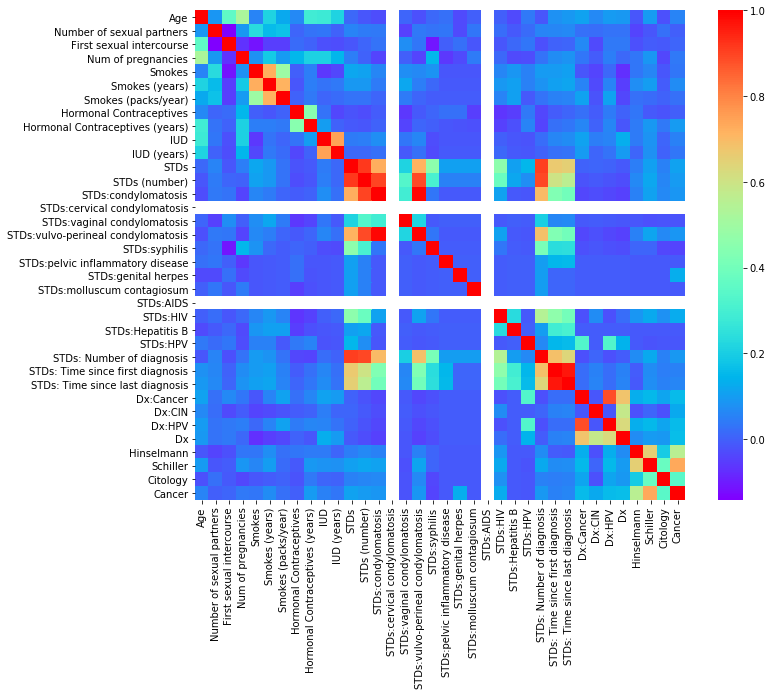

In [61]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

The heatmap above displays the correlation between features within our data. We observe that some multicollinearity issues exist in variables that are closely related to one another (i.e. 'STDs' and 'STDs (number)', 'IUD' and 'IUD (years), or 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis'). However, outside these few exceptions, there appear to be relatively few multicollinearity issues. For those that do exist, we will watch for them in our modeling process and address these relationships appropriately.

### Continuous Feature Exploration

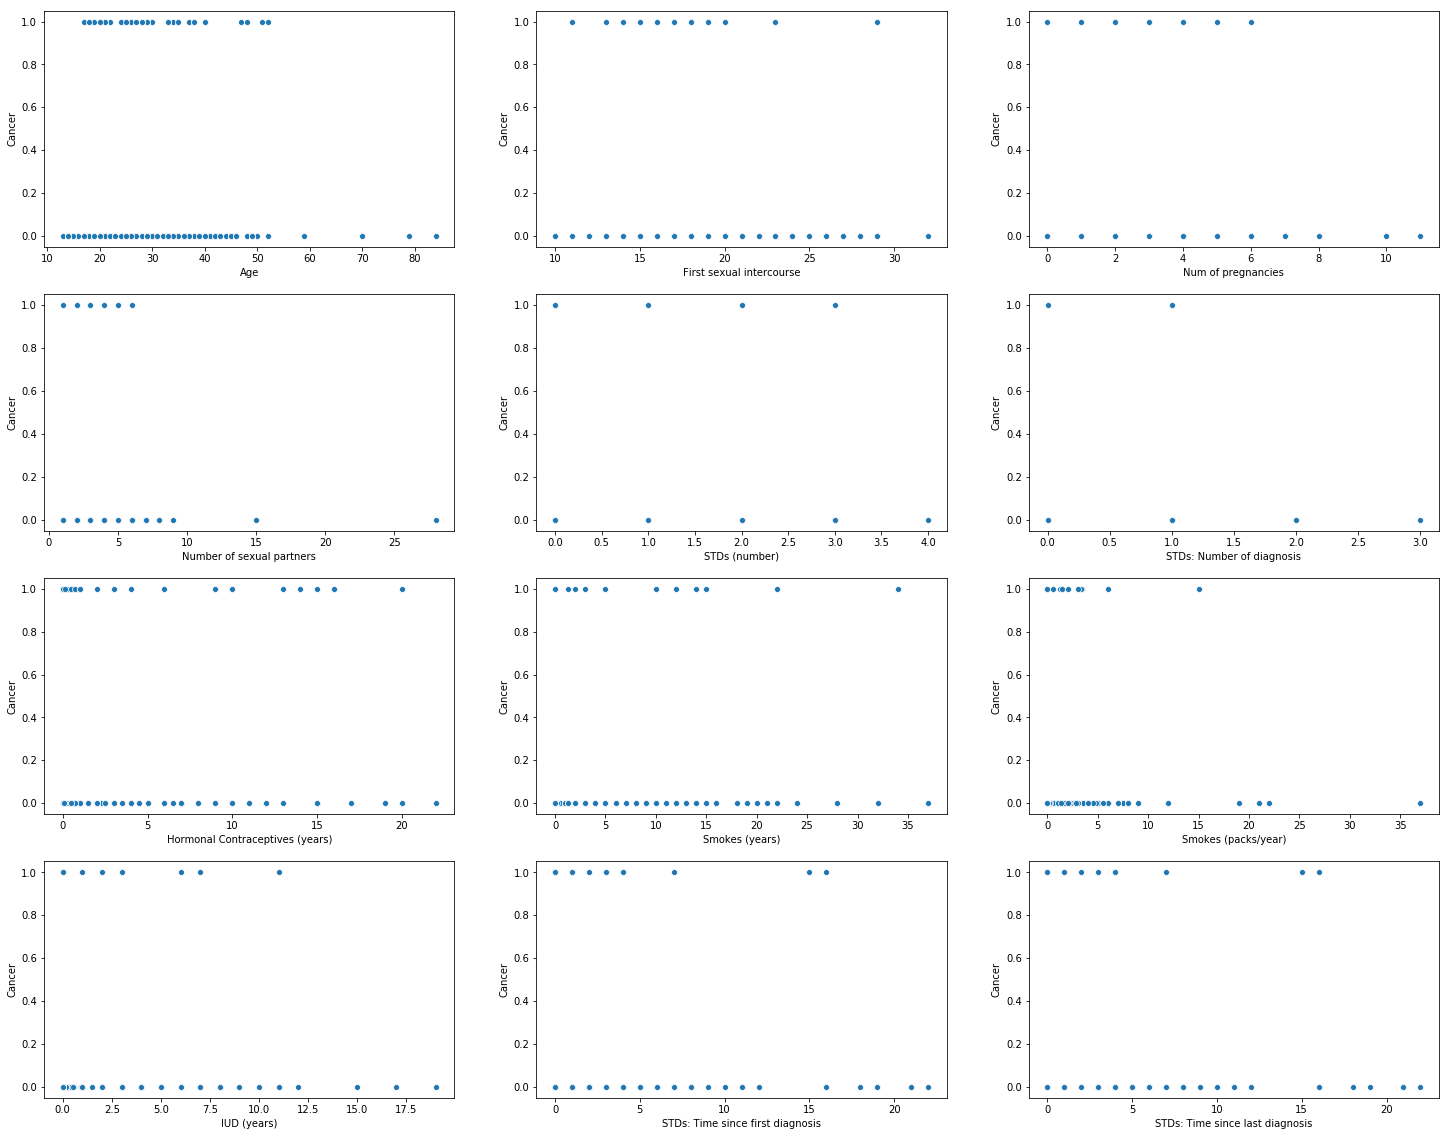

In [65]:
scatter_variables = ['Age','First sexual intercourse','Num of pregnancies','Number of sexual partners','STDs (number)',
                     'STDs: Number of diagnosis','Hormonal Contraceptives (years)','Smokes (years)','Smokes (packs/year)',
                     'IUD (years)','STDs: Time since first diagnosis','STDs: Time since last diagnosis']
f, axes = plt.subplots(4, 3, figsize = (25, 20))
f.suptitle('', fontsize = 24)
counter = 0
row = [0,0,0,1,1,1,2,2,2,3,3,3]
column = [0,1,2,0,1,2,0,1,2,0,1,2]
for feature in scatter_variables:
    sns.scatterplot(df[feature],df['Cancer'],ax=axes[row[counter],column[counter]])
    counter+=1

The scatterplots above attempt to identify any correlations between the continuous variables in our data and our target variable, cancer diagnosis via biopsy. As this is a classification problem, our target variable is simply measure as presence vs absence, as signified by 1 and 0, respectively. Thus, our scatterplots look different than traditional graphs of two continuous variable plotted against one another. However, in the plots above we notice that:
- The age of cancer patients varies, but all are younger than 60.
- Patients with high outliers in the features 'Num of pregnancies', 'Number of sexual partners', 'STDs: Number of diagnosis', 'Smokes (packs/year), and IUD (years) do not have cancer diagnoses; most of the cases fall within the normal range of values for these variables.
- Cancer diagnoses seem to be much more spread out across the range of values for 'Hormonal Contraceptives (years)', 'Smokes (years)', 'First sexual intercourse', and 'STDs: Time since first/last diagnosis'.

### Binarily Classified Feature Exploration

In the plots below, we consider the remaining features, which are all binarily divided and classfied like our target variable as presence vs absence. By creating dictionaries for each feature that total the overall counts for each of the four outcomes when plotted against our target, we can calculate the proportion of:
1. patients negative for both the feature and the target
2. patients postive for the feature and negative for the target
3. patients negative for the feature and positive for the target
4. patients positive for both the feature and the target

Using these dictionaries, we can plot the four outcomes as a scatterplot while using their proportional value as a magnitude to observe interesting trends within our data. Illustrated in the plots below, we notice the following:

- Smokers and women with IUDs are 4.1% more likely to have a positive cancer diagnosis.
- The presence of STDs increases the likelihood of positive biopsy results by 9.2%.
- None of the women with cases of syphillis, mollescum contagiosum, vaginal condylomatosis, or Hepatitis B were positive for the biopsy.
- The one woman with genital herpes was positive for the biopsy.
- The most impactful STD appears to be HIV. Women positive for HIV were over 18% more likely to be positive for the biopsy.
- The presence of hormonal contraceptives have little to no correlation on the presence of cancer diagnosis.
- No positive cases exist for the following self-reported STDs: cervical condylomatosis, pelvic inflammatory disease, AIDS, and HPV.
- Prior diagnoses with certain dieases increased the likelihood of a cervical cancer diagnosis significantly: 35% for prior cancer, 36% for CIN, 32% for HPV.
- Of our other methods potentially indicative of a cervical cancer diagnosis, Hinselmann and Schiller appear most correlated with our target, with 68% and 62% (respectively) of positive diagnoses also positive under the biopsy. Citology appears to be less accurate, with only 43% of positive cases also positive for the biopsy.

Feature: Smokes
        indicator  cancer  count  proportion
(0, 0)          0       0    533    0.933450
(0, 1)          0       1     38    0.066550
(1, 0)          1       0     83    0.892473
(1, 1)          1       1     10    0.107527


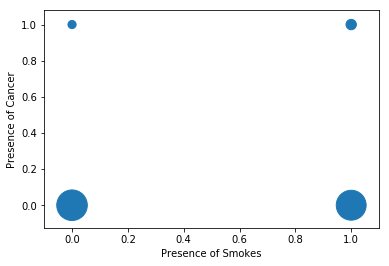



Feature: Hormonal Contraceptives
        indicator  cancer  count  proportion
(0, 0)          0       0    214    0.926407
(0, 1)          0       1     17    0.073593
(1, 0)          1       0    402    0.928406
(1, 1)          1       1     31    0.071594


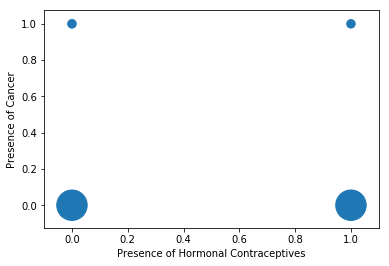



Feature: IUD
        indicator  cancer  count  proportion
(0, 0)          0       0    550    0.932203
(0, 1)          0       1     40    0.067797
(1, 0)          1       0     66    0.891892
(1, 1)          1       1      8    0.108108


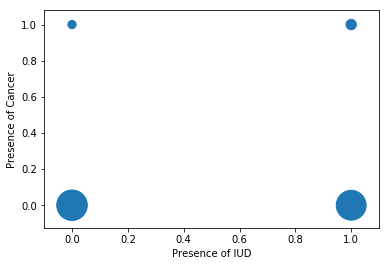



Feature: STDs
        indicator  cancer  count  proportion
(0, 0)          0       0    556    0.937605
(0, 1)          0       1     37    0.062395
(1, 0)          1       0     60    0.845070
(1, 1)          1       1     11    0.154930


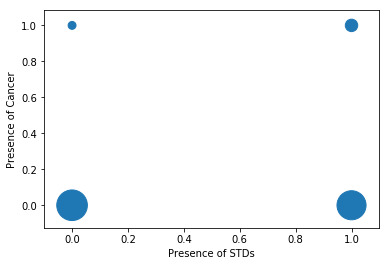



Feature: STDs:condylomatosis
        indicator  cancer  count  proportion
(0, 0)          0       0    581    0.932584
(0, 1)          0       1     42    0.067416
(1, 0)          1       0     35    0.853659
(1, 1)          1       1      6    0.146341


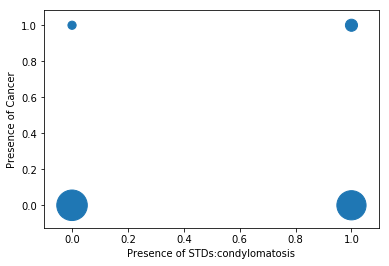



Feature: STDs:cervical condylomatosis
        indicator  cancer  count  proportion
(0, 0)          0       0    616    0.927711
(0, 1)          0       1     48    0.072289
(1, 0)          1       0      0    0.000000
(1, 1)          1       1      0    0.000000


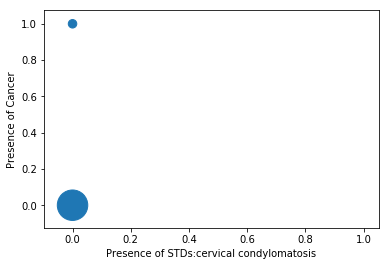



Feature: STDs:vaginal condylomatosis
        indicator  cancer  count  proportion
(0, 0)          0       0    612    0.927273
(0, 1)          0       1     48    0.072727
(1, 0)          1       0      4    1.000000
(1, 1)          1       1      0    0.000000


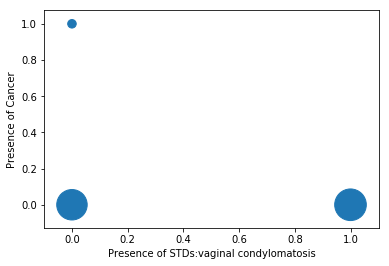



Feature: STDs:vulvo-perineal condylomatosis
        indicator  cancer  count  proportion
(0, 0)          0       0    582    0.932692
(0, 1)          0       1     42    0.067308
(1, 0)          1       0     34    0.850000
(1, 1)          1       1      6    0.150000


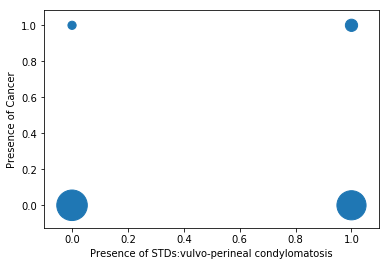



Feature: STDs:syphilis
        indicator  cancer  count  proportion
(0, 0)          0       0    599    0.925811
(0, 1)          0       1     48    0.074189
(1, 0)          1       0     17    1.000000
(1, 1)          1       1      0    0.000000


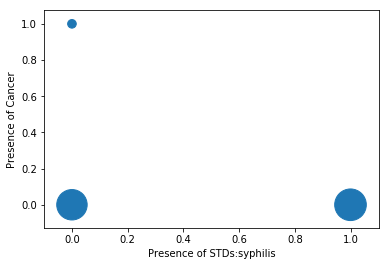



Feature: STDs:pelvic inflammatory disease
        indicator  cancer  count  proportion
(0, 0)          0       0    616    0.927711
(0, 1)          0       1     48    0.072289
(1, 0)          1       0      0    0.000000
(1, 1)          1       1      0    0.000000


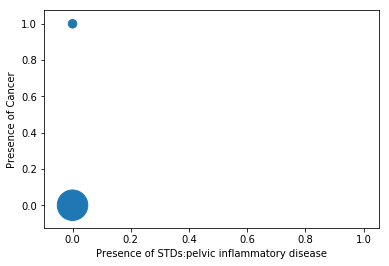



Feature: STDs:genital herpes
        indicator  cancer  count  proportion
(0, 0)          0       0    616     0.92911
(0, 1)          0       1     47     0.07089
(1, 0)          1       0      0     0.00000
(1, 1)          1       1      1     1.00000


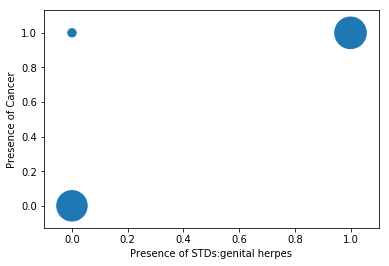



Feature: STDs:molluscum contagiosum
        indicator  cancer  count  proportion
(0, 0)          0       0    615    0.927602
(0, 1)          0       1     48    0.072398
(1, 0)          1       0      1    1.000000
(1, 1)          1       1      0    0.000000


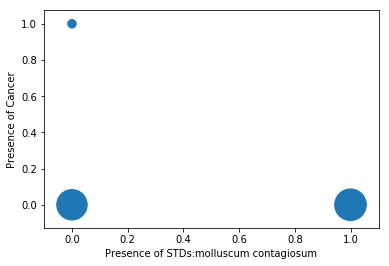



Feature: STDs:AIDS
        indicator  cancer  count  proportion
(0, 0)          0       0    616    0.927711
(0, 1)          0       1     48    0.072289
(1, 0)          1       0      0    0.000000
(1, 1)          1       1      0    0.000000


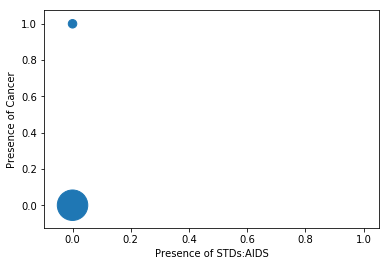



Feature: STDs:HIV
        indicator  cancer  count  proportion
(0, 0)          0       0    604    0.932099
(0, 1)          0       1     44    0.067901
(1, 0)          1       0     12    0.750000
(1, 1)          1       1      4    0.250000


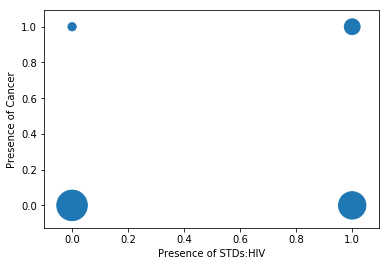



Feature: STDs:Hepatitis B
        indicator  cancer  count  proportion
(0, 0)          0       0    615    0.927602
(0, 1)          0       1     48    0.072398
(1, 0)          1       0      1    1.000000
(1, 1)          1       1      0    0.000000


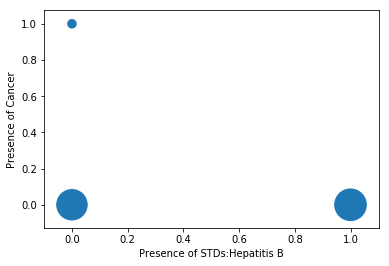



Feature: STDs:HPV
        indicator  cancer  count  proportion
(0, 0)          0       0    616    0.927711
(0, 1)          0       1     48    0.072289
(1, 0)          1       0      0    0.000000
(1, 1)          1       1      0    0.000000


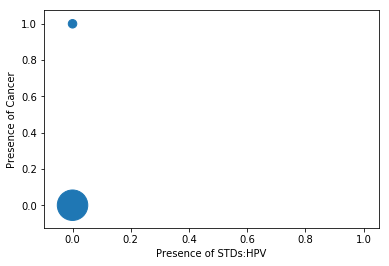



Feature: Dx:Cancer
        indicator  cancer  count  proportion
(0, 0)          0       0    609    0.934049
(0, 1)          0       1     43    0.065951
(1, 0)          1       0      7    0.583333
(1, 1)          1       1      5    0.416667


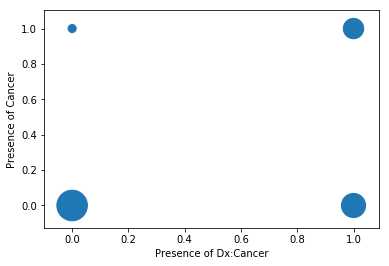



Feature: Dx:CIN
        indicator  cancer  count  proportion
(0, 0)          0       0    612    0.931507
(0, 1)          0       1     45    0.068493
(1, 0)          1       0      4    0.571429
(1, 1)          1       1      3    0.428571


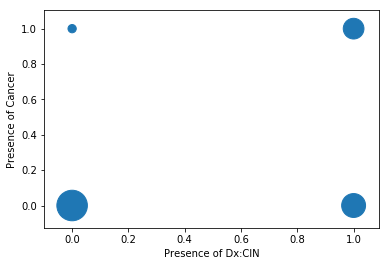



Feature: Dx:HPV
        indicator  cancer  count  proportion
(0, 0)          0       0    608    0.933948
(0, 1)          0       1     43    0.066052
(1, 0)          1       0      8    0.615385
(1, 1)          1       1      5    0.384615


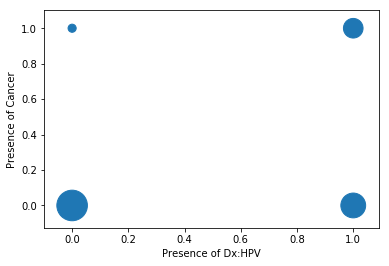



Feature: Dx
        indicator  cancer  count  proportion
(0, 0)          0       0    605    0.935085
(0, 1)          0       1     42    0.064915
(1, 0)          1       0     11    0.647059
(1, 1)          1       1      6    0.352941


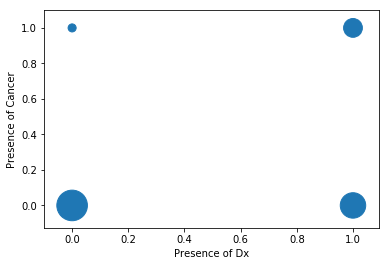



Feature: Hinselmann
        indicator  cancer  count  proportion
(0, 0)          0       0    606    0.958861
(0, 1)          0       1     26    0.041139
(1, 0)          1       0     10    0.312500
(1, 1)          1       1     22    0.687500


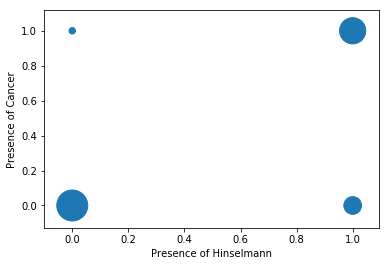



Feature: Schiller
        indicator  cancer  count  proportion
(0, 0)          0       0    591    0.989950
(0, 1)          0       1      6    0.010050
(1, 0)          1       0     25    0.373134
(1, 1)          1       1     42    0.626866


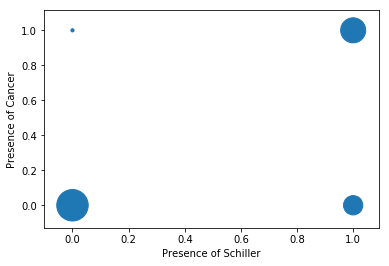



Feature: Citology
        indicator  cancer  count  proportion
(0, 0)          0       0    595    0.948963
(0, 1)          0       1     32    0.051037
(1, 0)          1       0     21    0.567568
(1, 1)          1       1     16    0.432432


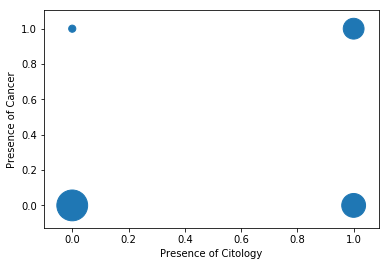

In [68]:
feature_presence=['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis',
                  'STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
                 'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum',
                 'STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV', 'Dx:Cancer',
                 'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology']
for feature in feature_presence:
    x = features[feature]
    y = target
    dictionary = {(0,0):[0,0,0],(0,1):[0,1,0],(1,0):[1,0,0],(1,1):[1,1,0]}
    for n in list((range(len(x)))):
        if n in x.index:
            indicator = x[n]
            cancer = y[n]
            dictionary[(indicator,cancer)][2]+=1
    to_graph = pd.DataFrame.from_dict(dictionary,orient='index',columns=['indicator','cancer','count'])
    proportion=[]
    proportion.append(to_graph['count'][0]/(to_graph['count'][0]+to_graph['count'][1]))
    proportion.append(to_graph['count'][1]/(to_graph['count'][0]+to_graph['count'][1]))
    proportion.append(to_graph['count'][2]/(to_graph['count'][2]+to_graph['count'][3]))
    proportion.append(to_graph['count'][3]/(to_graph['count'][2]+to_graph['count'][3]))
    to_graph['proportion']=proportion
    to_graph['proportion'].fillna(0,inplace=True)
    print('Feature: {}'.format(feature))
    print(to_graph)
    plt.scatter(to_graph.indicator, to_graph.cancer, s=list(to_graph['proportion']*1000))
    plt.xlabel('Presence of {}'.format(feature))
    plt.ylabel('Presence of Cancer')
    plt.show()
    print('\n')

### Linear Regression Model

Next, we will attempt to create a linear regression model for our features as predictive of biopsy results. As the target variable as binarily classified, this model will most likely result in lower than preferred r-squared values. However, our primary purpose in running this model will be to identify which features emerge as the most influential and significant when attempting to predict these results.

Starting by dividing our data in training and test sets, we fit an initial model and observe the results below.

In [80]:
from sklearn.model_selection import train_test_split
target = list(target)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,target)

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_int = sm.add_constant(X_train)
first_model = sm.OLS(y_train, X_int.astype(float)).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     22.76
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           5.86e-78
Time:                        13:23:27   Log-Likelihood:                 232.33
No. Observations:                 564   AIC:                            -400.7
Df Residuals:                     532   BIC:                            -261.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Age                                   -0.0098      0.010     -0.952      0.341      -0.030       0.010
Number of sexual partners              0.0054      0.007      0.774      0.439      -0.008       0.019
First sexual intercourse               0.0123      0.008      1.504      0.133      -0.004       0.028
Num of pregnancies                     0.0114      0.009      1.239      0.216      -0.007       0.030
Smokes                                 0.0048      0.011      0.455      0.650      -0.016       0.026
Smokes (years)                        -0.0139      0.014     -0.990      0.323      -0.042       0.014
Smokes (packs/year)                    0.0105      0.010      1.041      0.298      -0.009       0.030
Hormonal Contraceptives               -0.0039      0.008     -0.481      0.631      -0.020       0.012
Hormonal Contraceptives (years)        0.0082      0.009      0.952      0.342      -0.009       0.025
IUD                                   -0.0064      0.010     -0.613      0.540      -0.027       0.014
IUD (years)                           -0.0008      0.010     -0.084      0.933      -0.020       0.019
STDs                                   0.0704      0.026      2.723      0.007       0.020       0.121
STDs (number)                         -0.0786      0.014     -5.657      0.000      -0.106      -0.051
STDs:condylomatosis                    0.0288      0.049      0.583      0.560      -0.068       0.126
STDs:cervical condylomatosis       -1.078e-15   1.28e-16     -8.419      0.000   -1.33e-15   -8.27e-16
STDs:vaginal condylomatosis            0.0075      0.008      0.976      0.330      -0.008       0.023
STDs:vulvo-perineal condylomatosis     0.0251      0.046      0.548      0.584      -0.065       0.115
STDs:syphilis                          0.0022      0.012      0.182      0.856      -0.022       0.027
STDs:pelvic inflammatory disease       0.0031      0.007      0.458      0.647      -0.010       0.016
STDs:genital herpes                    0.0385      0.007      5.650      0.000       0.025       0.052
STDs:molluscum contagiosum            -1.7212      0.191     -9.003      0.000      -2.097      -1.346
STDs:AIDS                          -1.927e-15   2.13e-16     -9.051      0.000   -2.35e-15   -1.51e-15
STDs:HIV                               0.0244      0.013      1.948      0.052      -0.000       0.049
STDs:Hepatitis B                       0.0016      0.007      0.229      0.819      -0.012       0.015
STDs:HPV                              -0.0042      0.008     -0.534      0.593      -0.020       0.011
STDs: Number of diagnosis             -0.0449      0.023     -1.941      0.053      -0.090       0.001
STDs: Time since first diagnosis       0.0085      0.027      0.312      0.755      -0.045      

As expected, our r-squared and adjusted r-squared values are low here, just 0.570 and 0.545, respectively. Many of our features have p-values above 0.05 and the warnings indicate that multicollinearity issues exist between them. The F-statistic for our model is low, but the probability of this statistic is much lower than 0.05, indicating that the relationship emerging in our model may be significant. However, before determining which features are most significant in this relationship, we must rework and tweak the model.

In [83]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.02568812496632727
Test Mean Squarred Error: 0.030032715632662906


The MSE for both our training and test data are fairly low, indicating that our initial model works well when applied to other data. To address the issues identified above, however, we will proceed by trimming the number of features we use and eliminating those with p-values above 0.05. Using recursive feature elimination, we will obtain the importance of each feature in predicting our target variable, trimming the least important features from our set of variables. We will complete this process for various numbers of features to determine which will optimize our results to the most significant degree. Then we will perform RFE using that specified number of features and determine which emerge as the most influential in our model.

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

r_list = []
adj_r_list = []
list_n = list(range(5,35,5))
for n in list_n:
    selector = RFE(linreg, n)
    selector = selector.fit(X_train, np.ravel(y_train))
    selected_columns = X_train.columns[selector.support_ ]
    
    linreg.fit(X_train[selected_columns],y_train)
    yhat = linreg.predict(X_train[selected_columns])
    
    SS_Residual = np.sum((y_train-yhat)**2)
    SS_Total = np.sum((y_train-np.mean(y_train))**2)
    r_sq = 1 - (SS_Residual/SS_Total)
    r_sq_adj = 1 - (1-r_sq)*((len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    
    y_hat_train = linreg.predict(X_train[selected_columns])
    y_hat_test = linreg.predict(X_test[selected_columns])

    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Number of Features Selected:',n)
    
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)
    print('\n')
    print('r-squared:',r_sq)
    print('adjusted r-squared:',r_sq_adj)
    print('\n')
    print('\n')
    r_list.append(r_sq)
    adj_r_list.append(r_sq_adj)

Number of Features Selected: 5
Train Mean Squarred Error: 0.027227929039747252
Test Mean Squarred Error: 0.03209458881372746


r-squared: 0.5443447329636237
adjusted r-squared: 0.5141403118532578




Number of Features Selected: 10
Train Mean Squarred Error: 0.026152023413181593
Test Mean Squarred Error: 0.030433720844692164


r-squared: 0.562349850608196
adjusted r-squared: 0.533338950553815




Number of Features Selected: 15
Train Mean Squarred Error: 0.02593461439955358
Test Mean Squarred Error: 0.030011146753744663


r-squared: 0.5659881575105011
adjusted r-squared: 0.5372184331030532




Number of Features Selected: 20
Train Mean Squarred Error: 0.0258055807257246
Test Mean Squarred Error: 0.030769392182448944


r-squared: 0.5681475164914724
adjusted r-squared: 0.5395209314104147




Number of Features Selected: 25
Train Mean Squarred Error: 0.02570326012860402
Test Mean Squarred Error: 0.030461314818751865


r-squared: 0.5698598361811646
adjusted r-squared: 0.5413467571401434




In the results above, it appears that the number of features does not significantly influence the r-square and adjusted r-squared values, nor the MSE values for the training and test data, although all four values steadily rise as the number of features included increase. However, the impact of this increase appears to slow down after we get above 15 features. Thus, for the sake of reducing the complexity of our data, and for determing the features of greatest importance, we will use 15 features in the modified model below.

In [87]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(X_train, np.ravel(y_train))

In [88]:
top_features = X_train.columns[selector.support_]
top_features

Index(['Smokes (years)', 'Smokes (packs/year)', 'IUD', 'STDs', 'STDs (number)',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:genital herpes', 'STDs:HIV', 'STDs:HPV',
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Hinselmann',
       'Schiller'],
      dtype='object')

The results above indicate some similar trends to our prior exploratory analysis:
- Most notably: the presence of IUDs, STDs, STDs: HIV, STDs: vulvo-perineal condylomatosis led to much higher likelihoods of positive biopsies.
- The one patient with genital herpes was positive for the biopsy, allowing it to be strongly influential in our model.
- Similarly, of the 17 patients with a history of syphillis, none were positive for the biopsy.
- Prior diagnoses with cancer and CIN appear to be consistently significant in leading to positive biopsies.
- We identified Hinselmann and Schiller as highly correlated to our target variable.

It appears that these features in particular consistently emerge as top indicators of a positive biopsy.

In [91]:
X_int = sm.add_constant(X_train[top_features])
rfe_model = sm.OLS(y_train, X_int.astype(float)).fit()
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     47.64
Date:                Tue, 23 Jul 2019   Prob (F-statistic):           4.88e-89
Time:                        13:27:36   Log-Likelihood:                 229.63
No. Observations:                 564   AIC:                            -427.3
Df Residuals:                     548   BIC:                            -357.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0631      0.007      9.147      0.000       0.050       0.077
Smokes (years)                        -0.0103      0.010     -0.983      0.326      -0.031       0.010
Smokes (packs/year)                    0.0108      0.009      1.145      0.253      -0.008       0.029
IUD                                   -0.0080      0.007     -1.171      0.242      -0.021       0.005
STDs                                   0.0677      0.021      3.161      0.002       0.026       0.110
STDs (number)                         -0.0234      0.037     -0.625      0.532      -0.097       0.050
STDs:vulvo-perineal condylomatosis     0.0114      0.028      0.408      0.684      -0.043       0.066
STDs:syphilis                         -0.0109      0.012     -0.888      0.375      -0.035       0.013
STDs:genital herpes                    0.0351      0.007      5.356      0.000       0.022       0.048
STDs:HIV                               0.0106      0.012      0.851      0.395      -0.014       0.035
STDs:HPV                              -0.0084      0.007     -1.125      0.261      -0.023       0.006
STDs: Number of diagnosis             -0.0467      0.020     -2.280      0.023      -0.087      -0.006
Dx:Cancer                              0.0103      0.008      1.305      0.193      -0.005       0.026
Dx:CIN                                 0.0304      0.008      3.992      0.000       0.015       0.045
Hinselmann                             0.0494      0.009      5.482      0.000       0.032       0.067
Schiller                               0.1339      0.009     14.177      0.000       0.115       0.152
==============================================================================
Omnibus:                      131.286   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3207.116
Skew:                           0.346   Prob(JB):                         0.00
Kurtosis:                      14.662   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When we run a revised OLS model based on these top 15 features, our r-squared and adjusted r-squared values remain approximately the same, although now more similar in value due to the reduced degrees of freedom. However, our F-statistic has increased substantially, while the probability of this statistic remains quite low. The multicollinearity warning no longer exists, although some p-values for our features remain higher than we would like.

In [92]:
linreg.fit(X_train[top_features], y_train)

y_hat_train = linreg.predict(X_train[top_features])
y_hat_test = linreg.predict(X_test[top_features])

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.02593461439955358
Test Mean Squarred Error: 0.030011146753744663


Our MSE values for both training and test data remain low, indicating our revised model remains effective for applications to new sets of data.

Finally, we will trim the features with p-values greater than 0.05 from our first model and create a final model based on the remaining features.

In [93]:
final_features = pd.DataFrame(first_model.pvalues < 0.05, columns=['pvalue'])
to_add = []
for column in scaled_features.columns:
    if final_features.loc[column]['pvalue']==True:
        to_add.append(column)
final_model = pd.DataFrame(scaled_features[to_add])
final_model.shape

(753, 9)

In [94]:
final_model.head()

,STDs,STDs (number),STDs:cervical condylomatosis,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,Dx:CIN,Hinselmann,Schiller
0,-0.34236,-0.314496,0.0,-0.036466,-0.036466,0.0,-0.103626,-0.220786,-0.327648
1,-0.34236,-0.314496,0.0,-0.036466,-0.036466,0.0,-0.103626,-0.220786,-0.327648
2,-0.34236,-0.314496,0.0,-0.036466,-0.036466,0.0,-0.103626,-0.220786,-0.327648
3,-0.34236,-0.314496,0.0,-0.036466,-0.036466,0.0,-0.103626,-0.220786,-0.327648
4,-0.34236,-0.314496,0.0,-0.036466,-0.036466,0.0,-0.103626,-0.220786,-0.327648


In [104]:
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(final_model,target,test_size=0.2)
X_int = sm.add_constant(X_train_ols)
model = sm.OLS(y_train_ols, X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 23 Jul 2019   Prob (F-statistic):          1.43e-118
Time:                        14:16:31   Log-Likelihood:                 274.09
No. Observations:                 602   AIC:                            -534.2
Df Residuals:                     595   BIC:                            -503.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
STDs                             0.0249      0.016      1.532      0.126      -0.007       0.057
STDs (number)                   -0.0212      0.017     -1.283      0.200      -0.054       0.011
STDs:cervical condylomatosis -1.303e-14   1.15e-15    -11.314      0.000   -1.53e-14   -1.08e-14
STDs:genital herpes              0.0348      0.006      6.088      0.000       0.024       0.046
STDs:molluscum contagiosum      -1.9573      0.173    -11.324      0.000      -2.297      -1.618
STDs:AIDS                     -2.91e-20   2.49e-21    -11.686      0.000    -3.4e-20   -2.42e-20
Dx:CIN                           0.0348      0.008      4.355      0.000       0.019       0.050
Hinselmann                       0.0250      0.009      2.888      0.004       0.008       0.042
Schiller                         0.1756      0.009     20.001      0.000       0.158       0.193
==============================================================================
Omnibus:                      169.698   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5421.513
Skew:                          -0.541   Prob(JB):                         0.00
Kurtosis:                      17.662   Cond. No.                     6.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

With our new model, we obtain the highest r-squared and adjusted r-squared values yet, both above 0.60! Additionally, the F-statistic is quite a bit higher, now at 155.9, with an even lower probability value. Although our multicollinearity warning is back, the p-values for nearly all our features are below 0.05, with the exception of 'STDs' and 'STDs (number)', which may be producing the multicollinearity warning as they exhibit similarities across our data. It appears this model may be the best fit yet.

In [107]:
linreg.fit(X_train_ols, y_train_ols)

y_hat_train_ols = linreg.predict(X_train_ols)
y_hat_test_ols = linreg.predict(X_test_ols)

train_residuals_ols = y_hat_train_ols - y_train_ols
test_residuals_ols = y_hat_test_ols - y_test_ols

mse_train = np.sum((y_train_ols-y_hat_train_ols)**2)/len(y_train_ols)
mse_test =np.sum((y_test_ols-y_hat_test_ols)**2)/len(y_test_ols)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0235539536486966
Test Mean Squarred Error: 0.041952253592905164


Unfortuantely, our test MSE rose slightly, exhibiting a lesser goodness of fit than our training data, indicating that our model may not be as effectively applicable to other data sets as we thought. However, we will begin a more thorough classification modeling process in the next section. Before we proceed, however, let's observe which features in our final model prove most well-correlated to and influential in predicting a positive biopsy result.

In [106]:
model.params.sort_values(ascending = False)

Schiller                        1.756444e-01
STDs:genital herpes             3.477984e-02
Dx:CIN                          3.477097e-02
Hinselmann                      2.497278e-02
STDs                            2.487283e-02
STDs:AIDS                      -2.909866e-20
STDs:cervical condylomatosis   -1.303082e-14
STDs (number)                  -2.122422e-02
STDs:molluscum contagiosum     -1.957346e+00
dtype: float64

Once again, Schiller, STDs:genital herpes, Dx:CIN, Hinselmann, and STDs prove to be the most highly significant features when predicting the results of patient biopsies.

## Modeling Our Data

Below, we engage in a thorough classification modeling process to determine which classifier proves most effective in our medical diagnosis of cervical cancer via the biopsy. In this section, we will create and test models using:
- K Nearest Neighbors classifiers
- Logistic regression
- Decision tree classifiers
- Ensemble methods (bagging and random forest)
- A final logistic regression pipeline

While many of these models may prove to be effective in classifying our target variable, our primary consideration will be to reduce the number of false negatives, even if this means the number of false positives must rise. In the medical world, it remains far less harmful to misdiagnose a patient with cancer, despite the emotional trauma this can cause, than to miss a positive diagnosis and leave a patient untreated. Thus, we will reward models with significantly low counts of false negatives, and penalize those with a high count.

Furthermore, high levels of accuracy do not necessarily indicate that the model is effective. As the high majority of cases result in negative biopsies, a model can classify every single record as negative and still obtain approximately 88% accuracy. However, these models would miss every patient positive for cancer, thus invalidating our modeling process. We will pay more careful attention to the results of our confusion matrices, AUC values, and ROC curves, which provide far more information about how our models actually perform.

https://i.stack.imgur.com/U0hjG.png![image.png](attachment:image.png)

### K Nearest Neighbors Classifier

Starting with a simple KNN classifier, we aim to separate our target data into classes based on how they share similarities between feature characteristics. We will run this classifier on both the scaled data and the PCA-transformed features, and evaluate the performance of these models based on the confusion matrices they produce.

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import timeit
from sklearn.metrics import confusion_matrix

start = timeit.timeit()
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Yhat_train = model.predict(X_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(X_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
end = timeit.timeit()
print("Accuracy:",acc_train)
print("Accuracy:",acc_test)
print ("Time Taken:", end - start)

cm_knn = confusion_matrix(y_test, Yhat_test)
print(cm_knn)

Accuracy: 0.9556737588652482
Accuracy: 0.9153439153439153
Time Taken: -0.002811360998748569
[[171   1]
 [ 15   2]]


In [109]:
import itertools
def pretty_confusion_matrix(cnf_matrix, y, title):
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()

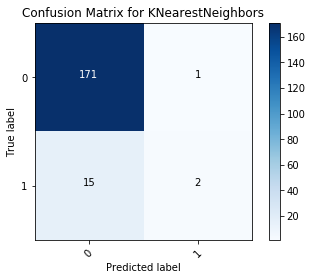

In [110]:
pretty_confusion_matrix(cm_knn, target, 'KNearestNeighbors')

While the initial KNN model has a training accuracy of 95.5% and a testing accuracy of 91.5%, we can see that the model misdiagnoses nearly all the positive target results. Thus, the recall value is low, only 0.118, with a high number of Type II errors. This model is a no-go, but let's see if we can improve our KNN classifier by using the PCA data.

In [140]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_principalcomponents,target)

In [141]:
start = timeit.timeit()
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train_pca)
Yhat_train_pca = model.predict(X_train_pca)
acc_train_pca = metrics.accuracy_score(Yhat_train_pca, y_train_pca)
Yhat_test_pca = model.predict(X_test_pca)
acc_test_pca = metrics.accuracy_score(Yhat_test_pca, y_test_pca)
end = timeit.timeit()
print("Accuracy:",acc_train_pca)
print("Accuracy:",acc_test_pca)
print ("Time Taken:", end - start)

cm_knn_pca = confusion_matrix(y_test_pca, Yhat_test_pca)
print(cm_knn_pca)

Accuracy: 0.9485815602836879
Accuracy: 0.9629629629629629
Time Taken: 0.0047288879977713805
[[172   3]
 [  4  10]]


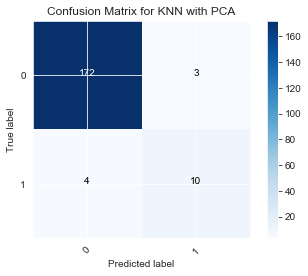

In [142]:
pretty_confusion_matrix(cm_knn_pca, target, 'KNN with PCA')

A huge improvement! We only see 4 Type II errors above, represented by the third quadrant, thus resulting in a recall value of 0.714. Our accuracy is improved with regards to our test set as well, but let's move on to more complex models to see if we can build upon these improvements.

### Logistic Regression

Logistic regression builds off our work with linear regression by modifying the functions we use to better fit a classification problem. Whereas our linear regression equations produce lines of best fit for our model, logistic regressions draw upon sigmoid functions that create s-shaped curves diverging to values of 0 (negative for cancer) or 1 (positive for cancer). As we saw in our exploration, many of our variables, including our target feature 'Cancer', are binarily divided and thus, a logistic regression model may be a much better fit for our data. Let's check it out below!

In [143]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

cm_logreg = confusion_matrix(y_test, y_hat_test)
print(cm_logreg)

549
0.973404255319149
175
0.9259259259259259
[[168   4]
 [ 10   7]]


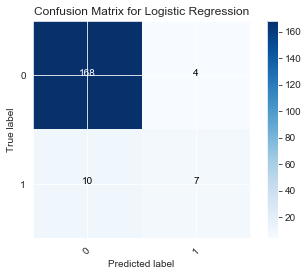

In [144]:
pretty_confusion_matrix(cm_logreg, target, 'Logistic Regression')

Our initial logistic regression model, run on training and test sets for all 35 scaled features, appears to be slightly better than our initial KNN model. Although producing an accuracy rate of 92.5% for the test data, we see fewer Type II errors here, and have a recall score of 0.411. However, this model does not perform as effectively as our KNN model with PCA-transformed data. We'll explore our PCA-transformed logisitic regression next, but first, let's evaluate our logistic regression model further using an AUC score and ROC curve.

In [145]:
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

AUC: 0.9305745554035567


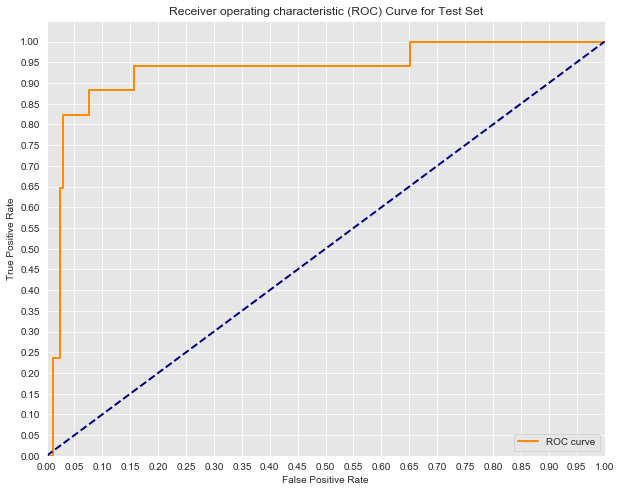

In [146]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

The receiver operating characteristic (ROC) curve plots our model at different decision thresholds by comparing the true positive rate (TPR) against the false positive rate (FPR). We want a function that most closely resembles the Greek letter gamma, rising vertically along the y-axis until it reaches the top and then coasting horizontally along the line y = 1.00. This is an idealized case and we are unable to achieve exactly that, but the closer we can get, the more confidence we can have in the performance of our model.

Additionally, the area under the ROC curve (AUC) measures the two-dimensional space under the ROC, just like an integral in calculus class. In our idealized scenario, this value would be 1.00, a square with dimensions 1x1. However, once again, we are attempting to reach a value as close to this idealized measure as possible.

In the example above, our TPR rises without penalty from the FPR until we reach TPR 0.94 and FPR 0.16. Then, our FPR increases fairly dramatically in order to improve our TPR. With an AUC value of 0.93, the model performs fairly well, but I'm confident that we can do even better through further modeling!

Next, we will create our second logistic regression model using our PCA-transformed data.

In [204]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
#Your code here
model_log_pca = logreg.fit(X_train_pca, y_train_pca)
model_log_pca

y_hat_test_pca = logreg.predict(X_test_pca)
y_hat_train_pca = logreg.predict(X_train_pca)

residuals = y_train_pca - y_hat_train_pca
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test_pca - y_hat_test_pca
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

cm_logreg_pca = confusion_matrix(y_test_pca, y_hat_test_pca)
print(cm_logreg_pca)

526
0.9326241134751773
176
0.9312169312169312
[[163  12]
 [  1  13]]


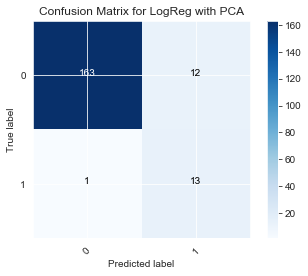

In [205]:
pretty_confusion_matrix(cm_logreg_pca, target, 'LogReg with PCA')

Wow! What an improvement with regards to our false negative rate - only 1 Type II error with this model. Although our accuracy scores are only slightly above 93%, these scores are comparable for the training and test data, and we achieve a recall rate of 0.929. However, our precision score falls to just under 50%; while this model emerges as our current top contender, we will have to keep this in mind as we explore further models, to see if we can find one that minimizes both Type II and Type I errors. But first, let's explore the ROC curve for our PCA-transformed logistic regression. 

In [206]:
y_score = model_log_pca.decision_function(X_test_pca)

fpr, tpr, thresholds = roc_curve(y_test_pca, y_score)

y_train_score = model_log_pca.decision_function(X_train_pca)
train_fpr, train_tpr, thresholds = roc_curve(y_train_pca, y_train_score)

AUC: 0.959591836734694


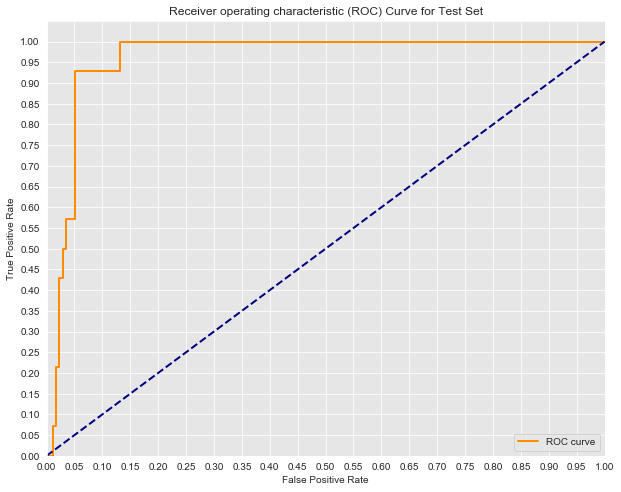

In [207]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

Here, we observe that our AUC value has improved! Up to 0.96, this value matches our graph as well; the ROC curve appears to maximize the TPR at 1.00 while minimizing the FPR at 0.13, a true upgrade from our first model. Next, we attempt to further maximize our model statistics by utilizing GridSearch to find the optimal parameters.

#### Implementing Grid Search

GridSearch allows us to develop models for different combinations of parameters in order to determine which combination performs best. With 2 possibilities for 'penalty', 20 for 'C', 2 for 'fit_intercept', and our cross validation set to 3, GridSearch will run through 2 x 20 x 2 x 3 = 240 possible combinations to find the optimal set of parameters.

In [182]:
from sklearn.model_selection import GridSearchCV, cross_val_score

logreg_param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'fit_intercept' : [True, False],
    'solver' : ['liblinear']
}
    
logreg_clf = LogisticRegression()
logreg_grid_search = GridSearchCV(logreg_clf, logreg_param_grid, cv=3, return_train_score=True)
logreg_grid_search.fit(scaled_features, target)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'fit_intercept': [True, False], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [198]:
logreg_gs_training_score = np.mean(logreg_grid_search.cv_results_['mean_train_score'])
logreg_gs_testing_score = logreg_grid_search.score(X_test, y_test)

print("Mean Training Score: {:.4}%".format(logreg_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(logreg_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search with Logistic Regression:")
logreg_grid_search.best_params_

Mean Training Score: 94.81%
Mean Testing Score: 96.83%
Best Parameter Combination Found During Grid Search with Logistic Regression:


{'C': 0.23357214690901212,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'liblinear'}

In the results above, we see that the mean testing score for this model actually performs better than the training score, reaching a 96.41% accuracy. The best parameter combination found is also displayed; we will use this further in the code below.

In [187]:
y_hat_test_gs = logreg_grid_search.predict(X_test)
y_hat_train_gs = logreg_grid_search.predict(X_train)

residuals = y_train - y_hat_train_gs
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test - y_hat_test_gs
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

cm_logreg_gs = confusion_matrix(y_test, y_hat_test_gs)
print(cm_logreg_gs)

543
0.9627659574468085
183
0.9682539682539683
[[171   1]
 [  5  12]]


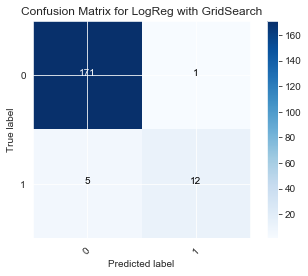

In [188]:
pretty_confusion_matrix(cm_logreg_gs, target, 'LogReg with GridSearch')

When we test the model on our training and test sets, we see that our accuracy scores remain above 96% for both. The confusion matrix, however, illustrates that while our false positives (Type I errors) have fallen considerably, our false negatives rose slightly. Thus, our recall score falls to about a 70% from the 92% we attained in our previous PCA-transformed model.

Next, we will create another model using the optimal parameters detected by the GridSearch program.

In [232]:
from sklearn.metrics import accuracy_score

logreg_final = LogisticRegression(C=0.23357214690901212,
                           fit_intercept=True,
                           penalty='l1', solver='liblinear')
logreg_final.fit(X_train, y_train)
train_pred = logreg_final.predict(X_train)
print(accuracy_score(y_train, train_pred))
y_pred = logreg_final.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm_logreg_final = confusion_matrix(y_test, y_pred)
print(cm_logreg_final)

logreg_cv_score = cross_val_score(logreg_final, X_train, y_train, cv=12)
mean_logreg_cv_score = np.mean(logreg_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_logreg_cv_score * 100))

0.9592198581560284
0.9365079365079365
[[171   1]
 [ 11   6]]
Mean Cross Validation Score: 95.04%


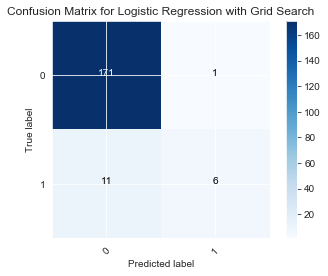

In [233]:
pretty_confusion_matrix(cm_logreg_final, target, "Logistic Regression with Grid Search")

Based on this second model with the optimal GridSearch parameters, we see that our accuracy has dropped slightly, and while, our Type I errors remain noteably low, our Type II errors are much higher in this model, leading to a recall score of oly 35%, not nearly high enough for further use as a top model. However, let's check out the ROC curve and AUC value before moving on to the next model.

AUC: 0.96015731874145


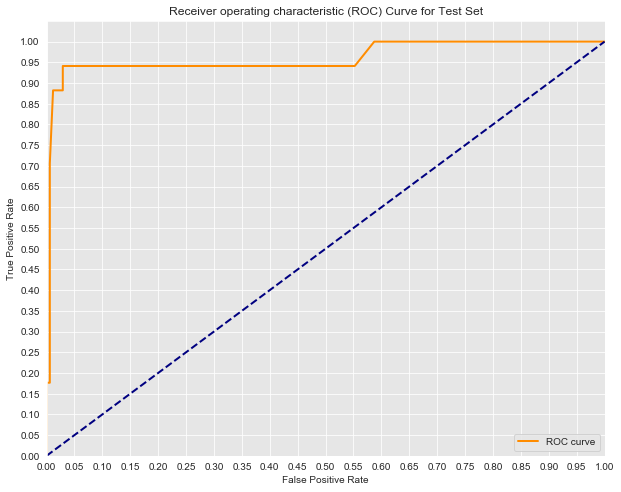

In [201]:
y_score = logreg_final.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = logreg_final.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

Here, we see that our AUC value is actually surprisingly higher, at just over 0.96. However, upon examining the ROC curve, we see that in order to maximize the true positive rate (thus minimizing the false negative rate), we must increase the false positive rate to nearly 0.60! This provides further evidence as to why this model may not be ideal for minimizing our false negatives for cancer diagnoses.

Finally, we will create a logistic regression model utilizing both our PCA-transformed data and GridSearch optimal parameters.

In [156]:
logreg_param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'fit_intercept' : [True, False],
    'solver' : ['liblinear']
},
    
logreg_clf = LogisticRegression()
logreg_grid_search_pca = GridSearchCV(logreg_clf, logreg_param_grid, cv=3, return_train_score=True)
logreg_grid_search_pca.fit(features_principalcomponents, target)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=({'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'fit_intercept': [True, False], 'solver': ['liblinear']},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [202]:
logreg_gs_training_score_pca = np.mean(logreg_grid_search_pca.cv_results_['mean_train_score'])
logreg_gs_testing_score_pca = logreg_grid_search_pca.score(X_test_pca, y_test_pca)

print("Mean Training Score: {:.4}%".format(logreg_gs_training_score_pca * 100))
print("Mean Testing Score: {:.4}%".format(logreg_gs_testing_score_pca * 100))
print("Best Parameter Combination Found During Grid Search with PCA Logistic Regression:")
logreg_grid_search_pca.best_params_

Mean Training Score: 91.72%
Mean Testing Score: 96.83%
Best Parameter Combination Found During Grid Search with PCA Logistic Regression:


{'C': 0.23357214690901212,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'liblinear'}

In the results above, we see that, once again, our testing score shows even better performance than our training score with regards to accuracy. As with our last model, we will test the optimal parameters found by GridSearch in a second model below. But first, let's further investigate this model's performace via the confusion matrix.

In [194]:
y_hat_test_gs_pca = logreg_grid_search_pca.predict(X_test_pca)
y_hat_train_gs_pca = logreg_grid_search_pca.predict(X_train_pca)

residuals = y_train_pca - y_hat_train_gs_pca
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test_pca - y_hat_test_gs_pca
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

cm_logreg_gs_pca = confusion_matrix(y_test_pca, y_hat_test_gs_pca)
print(cm_logreg_gs_pca)

542
0.9609929078014184
183
0.9682539682539683
[[172   3]
 [  3  11]]


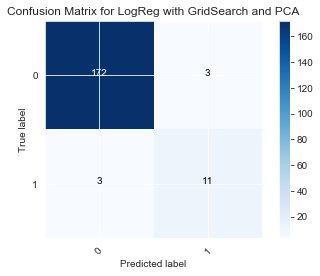

In [195]:
pretty_confusion_matrix(cm_logreg_gs_pca, target, 'LogReg with GridSearch and PCA')

In the confusion matrix above, we see that the false postive and false negative rate have both been minimized to a greater combined degree than in any previous model. Although our first logistic regression model utilizing PCA resulted in a better recall score, this model proves to be comparable as well, with both precision and recall scores of 0.786. 

In [229]:
logreg_final_pca = LogisticRegression(C=0.23357214690901212,
                           fit_intercept=True,
                           penalty='l1', solver='liblinear')
logreg_final_pca.fit(X_train_pca, y_train_pca)
train_pred_pca = logreg_final_pca.predict(X_train_pca)
print(accuracy_score(y_train_pca, train_pred_pca))
y_pred_pca = logreg_final_pca.predict(X_test_pca)
print(accuracy_score(y_test_pca, y_pred_pca))

cm_logreg_final_pca = confusion_matrix(y_test_pca, y_pred_pca)
print(cm_logreg_final_pca)

logreg_cv_score_pca = cross_val_score(logreg_final_pca, features_principalcomponents, target, cv=12)
mean_logreg_cv_score_pca = np.mean(logreg_cv_score_pca)

print("Mean Cross Validation Score: {:.4}%".format(mean_logreg_cv_score_pca * 100))

0.9627659574468085
0.9682539682539683
[[172   3]
 [  3  11]]
Mean Cross Validation Score: 96.15%


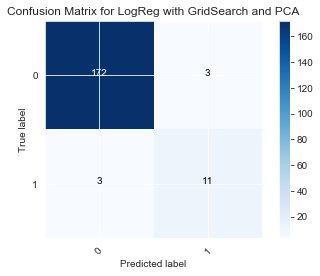

In [230]:
pretty_confusion_matrix(cm_logreg_final_pca, target, 'LogReg with GridSearch and PCA')

When we test the optimal parameters found for the PCA-transformed data using GridSearch, we find a high cross-validation score of 96.01% and the confusion matrix remains the same. This model seems to perform well repeatedly, when run under multiple circumstances. Let's check out the ROC curve and AUC score as well.

AUC: 0.9600000000000001


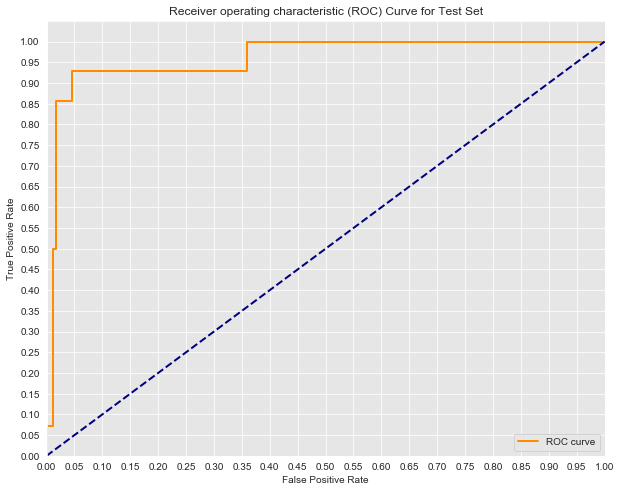

In [231]:
y_score = logreg_final_pca.decision_function(X_test_pca)

fpr, tpr, thresholds = roc_curve(y_test_pca, y_score)

y_train_score = logreg_final_pca.decision_function(X_train_pca)
train_fpr, train_tpr, thresholds = roc_curve(y_train_pca, y_train_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

The AUC score for this model is one of the highest thus far, only rivaled by the last model using GridSearch on our original scaled data. However, as displayed by the ROC curve, we are able to maximize our true positive rate without compromising our false positive rate nearly as much, keeping the FPR as low as 0.36 while reaching 100% for the TPR. Overall, it appears that logistic regression models created using our PCA-transformed data perform the best thus far; next we will explore decision tree models, another type of classifier, to see how they compare.

## Decision Tree

A decision tree model essentially creates a tree-like structure by differentiating our data based on a specific characteristic at each decision node. By continuously splitting our data into two groups by using different attributes, our model works to reach a point at which all the data is divided into our two target classes, presence or non-presence of cervical cancer. When using the model on future data, each node acts like a test, directing the new data along a certain path until it reaches an outcome at a leaf/terminal node that predicts (hopefully accurately) which class it belongs to.

Below, we create a basic decision tree classifier and test it on our original scaled data.

In [161]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [162]:
y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print(accuracy_score(y_train, y_pred_dt_train))
print(accuracy_score(y_test, y_pred_dt))

[[170   2]
 [  6  11]]
1.0
0.9576719576719577


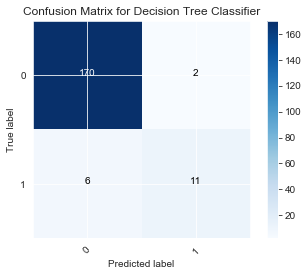

In [163]:
pretty_confusion_matrix(cm_dt, target, 'Decision Tree Classifier')

Based on the results above, we see that we achieve a fairly high accuracy score for our test data, almost 96%. While our precision score remains fairly high, at 84.6%, our recall is a bit lower than we would prefer, at 64.7% with several more false negatives than some other models.

In order to optimize our decision tree model, we will engage in a bit of hyperparameter tuning. By focusing on the tree depth, minimum sample splits, minimum sample leaves, and max features, we will find the optimal values for each. After that, we will specify those optimal values for our revised decision tree model in efforts to up the accuracy (and hopefully recall as well).

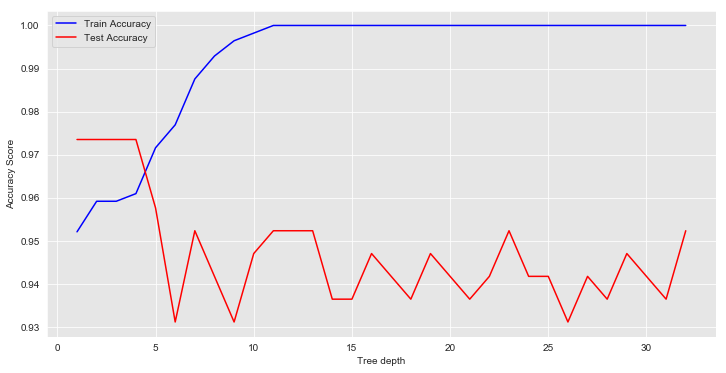

In [164]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Optimal values for the tree depth parameter: 4, 7, 11, 13, 23

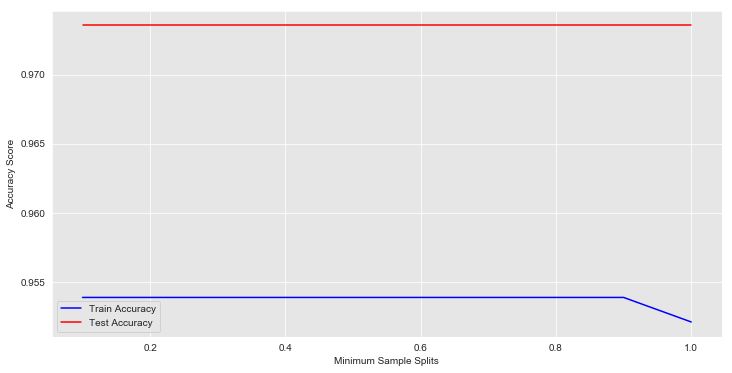

In [165]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_splits, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Minimum Sample Splits')
plt.legend()
plt.show()

Optimal parameters for minimum sample splits: None

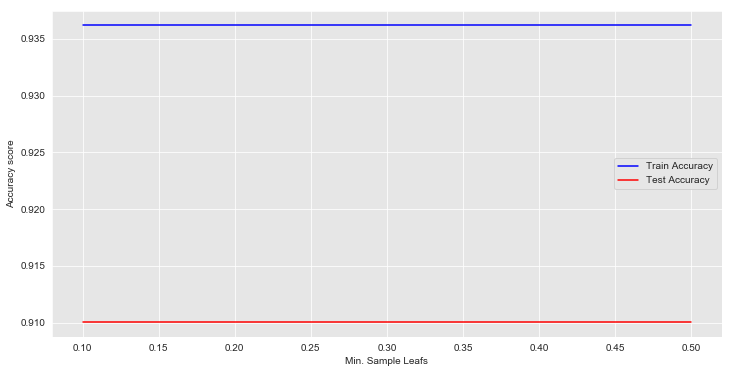

In [166]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train Accuracy')
plt.plot(min_samples_leafs, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()


Optimal values for minimum sample leafs: None

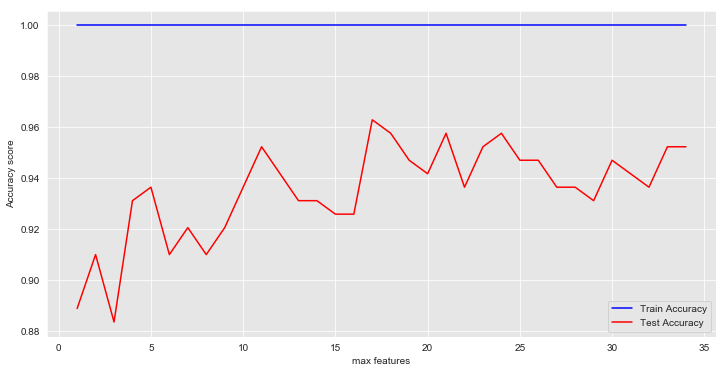

In [167]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_results.append(train_accuracy)
    y_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_results.append(test_accuracy)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train Accuracy')
plt.plot(max_features, test_results, 'r', label='Test Accuracy')

plt.ylabel('Accuracy score')
plt.xlabel('max features')
plt.legend()
plt.show()

Optimal values for max features: 11, 17, 21, 24

First, we will create a second decision tree model using the most optimal parameter found for each of the four parameters investigated above. We will test this with a cross-validation of 12, and analyze the results.

In [242]:
dt_final = DecisionTreeClassifier(criterion='entropy',
                           max_features=17,
                           max_depth=4)
dt_final.fit(X_train, y_train)
train_pred = dt_final.predict(X_train)
print(accuracy_score(y_train, train_pred))
y_pred = dt_final.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm_dt_final = confusion_matrix(y_test, y_pred)
print(cm_dt_final)

dt_cv_score = cross_val_score(dt_final, X_test, y_test, cv=12)
mean_dt_cv_score = np.mean(dt_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

0.9680851063829787
0.9523809523809523
[[170   2]
 [  7  10]]
Mean Cross Validation Score: 95.85%


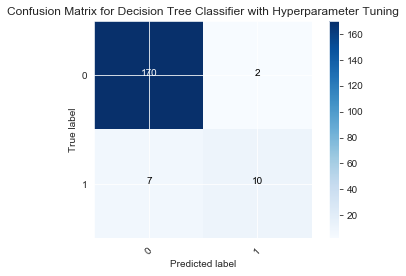

In [243]:
pretty_confusion_matrix(cm_dt_final, target, 'Decision Tree Classifier with Hyperparameter Tuning')

While both the accuracy score for the training and the test set are above 95%, with a high mean cross validation score, the confusion matrix shows that the recall for our revised model is still not optimal, much lower than many of the logistic regression models we developed. Next, we will attempt to use GridSearch on all the optimal values for the parameters explored through hyperparameter tuning, to see if a different combination can yield more optimal results.

In [216]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 7, 11, 13, 23],
    'max_features': [None, 11, 17, 21, 24],
}
dt_clf = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(scaled_features, target)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None, 4, 7, 11, 13, 23], 'max_features': [None, 11, 17, 21, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [245]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 99.36%
Mean Testing Score: 100.0%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini', 'max_depth': 23, 'max_features': 11}

Our mean training and test scores are exceptionally high! Let's check out the confusion matrix to see the results.

In [246]:
y_hat_test_gs = dt_grid_search.predict(X_test)
y_hat_train_gs = dt_grid_search.predict(X_train)

residuals = y_train - y_hat_train_gs
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

residuals = y_test - y_hat_test_gs
print(pd.Series(residuals).value_counts()[0])
print(pd.Series(residuals).value_counts(normalize=True)[0])

cm_dt_gs = confusion_matrix(y_test, y_hat_test_gs)
print(cm_dt_gs)

564
1.0
189
1.0
[[172   0]
 [  0  17]]


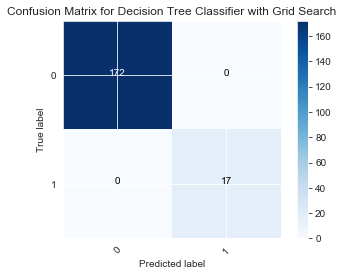

In [255]:
pretty_confusion_matrix(cm_dt_gs, target, "Decision Tree Classifier with Grid Search")

Wow! A perfect score, with 100% recall and precision, and 0 false negatives or false positives. It looks like we found our winner! Although it took a bit of exploration and repeated modeling, the payoff is worth it, especially within the context of our larger problem. When aiming for the highest quality of patient care, we should look to minimize false negatives above all else, but when we can achieve a model of  perfect accuracy, it's an even greater win for patient care.

Before we finalize and summarize our results, let's briefly check out some ensemble methods and do one last run through with our logistic regression and PCA-transformed data using pipelines.

## Support Vector Machines (SVM)

In [31]:
from sklearn.model_selection import train_test_split
target = list(target)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,target)

In [32]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred = svclassifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[163   6]
 [ 10  10]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       169
           1       0.62      0.50      0.56        20

   micro avg       0.92      0.92      0.92       189
   macro avg       0.78      0.73      0.75       189
weighted avg       0.91      0.92      0.91       189



## Ensemble Methods

Ensemble methods are highly popular for their often high accuracy and thoroughness when developing a model. These methods rely on multiple base models in order to obtain one optimal predictive model. While often used with decision tree models as the base, ensemble methods can be used with many other classifiers as well. Below, we will explore two types of ensemble methods: bagging and random forest classifiers.

Bagging (short for bootstrap aggregation) relies on decision trees created for each of the bootstrappd subsamples pulled from the original data. Based on the results from each of these decision trees, the aggregated result provides the final decision. In this way, we avoid overfitting or underfitting that sometimes occurs when relying on a single decison tree model.

In [274]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)
print(bagged_tree.score(X_train, y_train))
print(bagged_tree.score(X_test, y_test))

bagged_cv_score = cross_val_score(bagged_tree, scaled_features, target, cv=12)
mean_bagged_cv_score = np.mean(bagged_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_bagged_cv_score * 100))

0.9929078014184397
0.9576719576719577
Mean Cross Validation Score: 95.36%


Based on the results, we see a very high training accuracy score, with a moderately high test accuarcy score. While impressively maintained with a cross-validation of 12, this score doesn't quite beat our previous perfect model.

A random forest classifier works very similarly to the bagging model above. While still pulling distinct bootstrapped samples from our original data and creating separate decision tree classifiers for each, the key difference from bagging models is that random forest classifiers also distinctly separate the features for which these separate decision tree models split the data. Thus, each decision tree model is differentiated in a such a way that the final aggregate decision is oftentimes more accuarate than if split using similar (and even sometimes, the same) features.

In [275]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

forest_cv_score = cross_val_score(forest, scaled_features, target, cv=12)
mean_forest_cv_score = np.mean(forest_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_forest_cv_score * 100))

0.9698581560283688
0.9312169312169312
Mean Cross Validation Score: 94.69%


Unfortunately, it looks like this random forest classifier does not perform nearly as well as our bagging model, or our previous decision tree model. However, we are able to investigate which features emerged as the most important in making decisions throughout our model, which may provide interesting insights for our final data analysis. Let's check it out below.

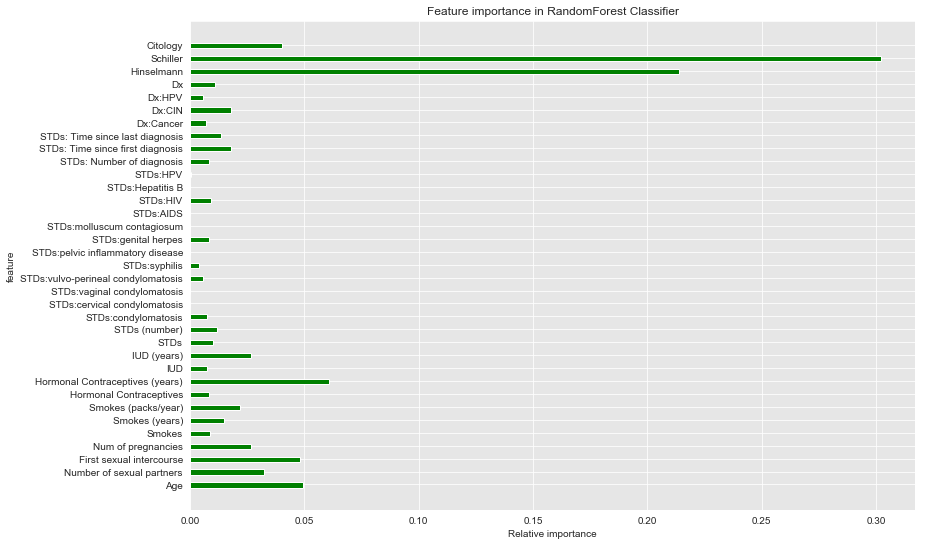

<Figure size 1440x1440 with 0 Axes>

In [277]:
col = list(X_train.columns)
#modelname.feature_importance_
y = forest.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(20,20))
fig.set_size_inches(13, 9, forward=True)

Based on the graph above, it appears that 'Schiller' and 'Hinselmann' emerge once again a highly significant factors in determining whether or not a patient has cervical cancer, with a combined relative importance of over 50% with regards to the other features. Following these, 'Hormonal Contraceptives (years)', 'First sexual intercourse', and 'Age' appear to be the next most significant in this particular model.

## Pipelines

Although we found a decision tree model with perfect accuracy, our logistic regression models developed using the PCA-transformed data also performed well in comparison to our other models. We'll test this once more, using pipelines, in order to determine whether it can measure up to our decision tree classifier. Pipelines work by streamlining the process for transforming, modeling, and testing our data, allowing us to do all that within just a few lines of code.

In [278]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('pca', PCA(n_components=15)),
         ('clf', LogisticRegression())])

# Fit the pipelines
pipe_lr.fit(X_train, y_train)

print(pipe_lr.score(X_test, y_test))

0.9470899470899471


In [279]:
train_pred = pipe_lr.predict(X_train)
print(accuracy_score(y_train, train_pred))
y_pred = pipe_lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm_logreg_gs_pipeline = confusion_matrix(y_test, y_pred)
print(cm_logreg_gs_pipeline)

0.9680851063829787
0.9470899470899471
[[171   1]
 [  9   8]]


AUC: 0.9883720930232558


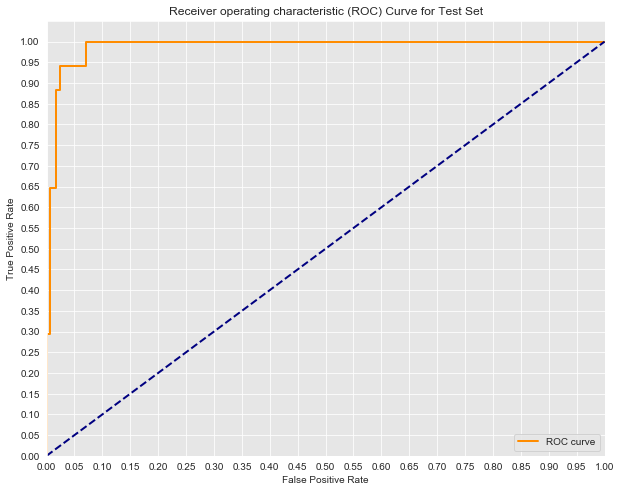

In [280]:
y_score = pipe_lr.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = pipe_lr.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

Based on the results above, it appears that our model does not achieve as high of precision and recall scores as I had hoped. While the AUC score is exceptionally high, we do not minimize the false negatives nearly enough in order to further utilize this model. It seems that our decision tree classifier developed using GridSearch parameters remains our frontrunner and top model for further classification work.

## Summary: Interpretting the Data

Based on our modeling results, the optimal model for further use was the decision tree classifier with parameters specified by utilizing GridSearch. While other models performed well, oftentimes with high levels of accuracy, or especially low counts of false negatives, this decision tree model performed with perfect accuracy with 0 counts of both false negatives and false positives.

Other noteable models included the logistic regression classifiers developed using PCA-transformed data, with particularly high recall compared to most other models. Within the context of cancer classification, minimizing false negatives is highly prioritized, even over minimizing false positives. While receiving a positive diagnosis when you do not actually have cancer can be difficult emotionally, this results is much more preferred than a false negative which indicates a missed diagnosis for someone that actually has cancer and thus, will not receive treatment.

In our exploration of the data prior to modeling, we discovered the following with regards to indications about the likelihood of cervical cancer:
- The presence of IUDs, STDs, STDs: HIV, STDs: vulvo-perineal condylomatosis led to much higher likelihoods of positive biopsies.
- The most impactful STD appears to be HIV. Women positive for HIV were over 18% more likely to be positive for the biopsy.
- Prior diagnoses with certain dieases increased the likelihood of a cervical cancer diagnosis significantly: 35% for prior cancer, 36% for CIN, 32% for HPV.
- Of our other methods potentially indicative of a cervical cancer diagnosis, Hinselmann and Schiller appear most correlated with our target, with 68% and 62% (respectively) of positive diagnoses also positive under the biopsy. Citology appears to be less accurate, with only 43% of positive cases also positive for the biopsy.
- Smokers and women with IUDs are 4.1% more likely to have a positive cancer diagnosis.
- The one woman with genital herpes was positive for the biopsy.
- No positive cases exist for the following self-reported STDs: cervical condylomatosis, pelvic inflammatory disease, AIDS, and HPV.

While Schiller and Hinselmann emerged as top predictors in nearly every test we ran, this data may not always be available as an initial variable for predictive use. Thus, future work involves the following:
- Perform a multiclass classification model and analysis with 'Hinselmann', 'Schiller', 'Citology', and 'Biopsy' all utilized as target variables.
- Compare models for classification between Hinselmann, Schiller, Citology, and Biopsy, with each as a separate target variable.
- Create classification models for Biopsy in the absence of the other three diagnoses.

Additionally, this dataset draws upon patients solely in Venezuela, where the particular patient care and hospital conditions may lead to the significance of certain factors over others, that may be different than in other countries. In future work, it would be ideal to pull data from other Latin American and South American countries to see what similarities and differences exist, as well as to perform comparsion against data from other parts of the world as well, such as the United States, Europe, Africa, etc. Without a greater diversity of data, it will prove difficult to extend our findings for use in any greater medical context.